In [1]:
# Healthcare Survey Analysis - Assignment Requirements
# Load CSV file and create required visualizations

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from user_class import User

print("🔍 Healthcare Survey Data Analysis - Jupyter Notebook")
print("=" * 60)

🔍 Healthcare Survey Data Analysis - Jupyter Notebook


In [2]:
# ASSIGNMENT REQUIREMENT: Load CSV file into Jupyter notebook
print("📁 Loading CSV file into Jupyter notebook...")
user = User('survey_data.csv')

# Display basic information
if not user.data.empty:
    print(f"✅ Successfully loaded {len(user.data)} survey responses")
    print("\nDataset Preview:")
    print(user.data.head())
else:
    print("❌ No data found. Please export CSV from Flask app first.")

📁 Loading CSV file into Jupyter notebook...
✅ Loaded 8 survey responses
✅ Successfully loaded 8 survey responses

Dataset Preview:
   age  gender  total_income  utilities  entertainment  school_fees  shopping  \
0   30  female         20000       1000           2000         3500      2000   
1   45    male        100000      20000           5000        20000      7000   
2   18  female         12000        200            150         4000       400   
3   60    male        350000      12000          10000        20000     10000   
4   55    male        250000      10000          20000        10000     30000   

   healthcare  
0        3000  
1        5000  
2        1000  
3       34000  
4       50000  


📊 REQUIREMENT 1: Ages with Highest Income
--------------------------------------------------
📊 AGES WITH HIGHEST INCOME:
------------------------------
Age 34: $500,000
Age 60: $350,000
Age 55: $250,000
Age 35: $200,000
Age 45: $200,000
Age 30: $20,000
Age 18: $12,000


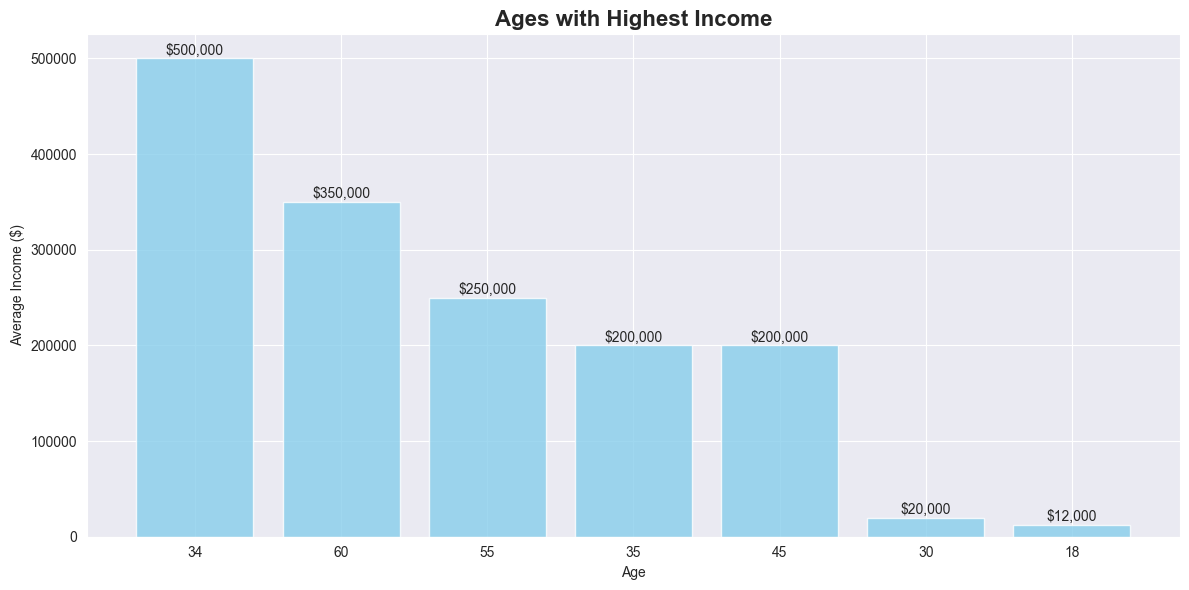

✅ Chart exported as 'age_income_chart.png' for PowerPoint


In [3]:
# ASSIGNMENT REQUIREMENT: Show ages with highest income
print("📊 REQUIREMENT 1: Ages with Highest Income")
print("-" * 50)

if not user.data.empty:
    age_income = user.analyze_age_income()

    # Create visualization
    plt.figure(figsize=(12, 6))
    age_income_top = age_income.head(10)
    plt.bar(range(len(age_income_top)), age_income_top.values, color='skyblue', alpha=0.8)
    plt.title('Ages with Highest Income', fontsize=16, fontweight='bold')
    plt.xlabel('Age')
    plt.ylabel('Average Income ($)')
    plt.xticks(range(len(age_income_top)), age_income_top.index)

    # Add value labels
    for i, v in enumerate(age_income_top.values):
        plt.text(i, v + 1000, f'${v:,.0f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.savefig('age_income_chart.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✅ Chart exported as 'age_income_chart.png' for PowerPoint")

👥 REQUIREMENT 2: Gender Distribution Across Spending Categories
----------------------------------------------------------------------


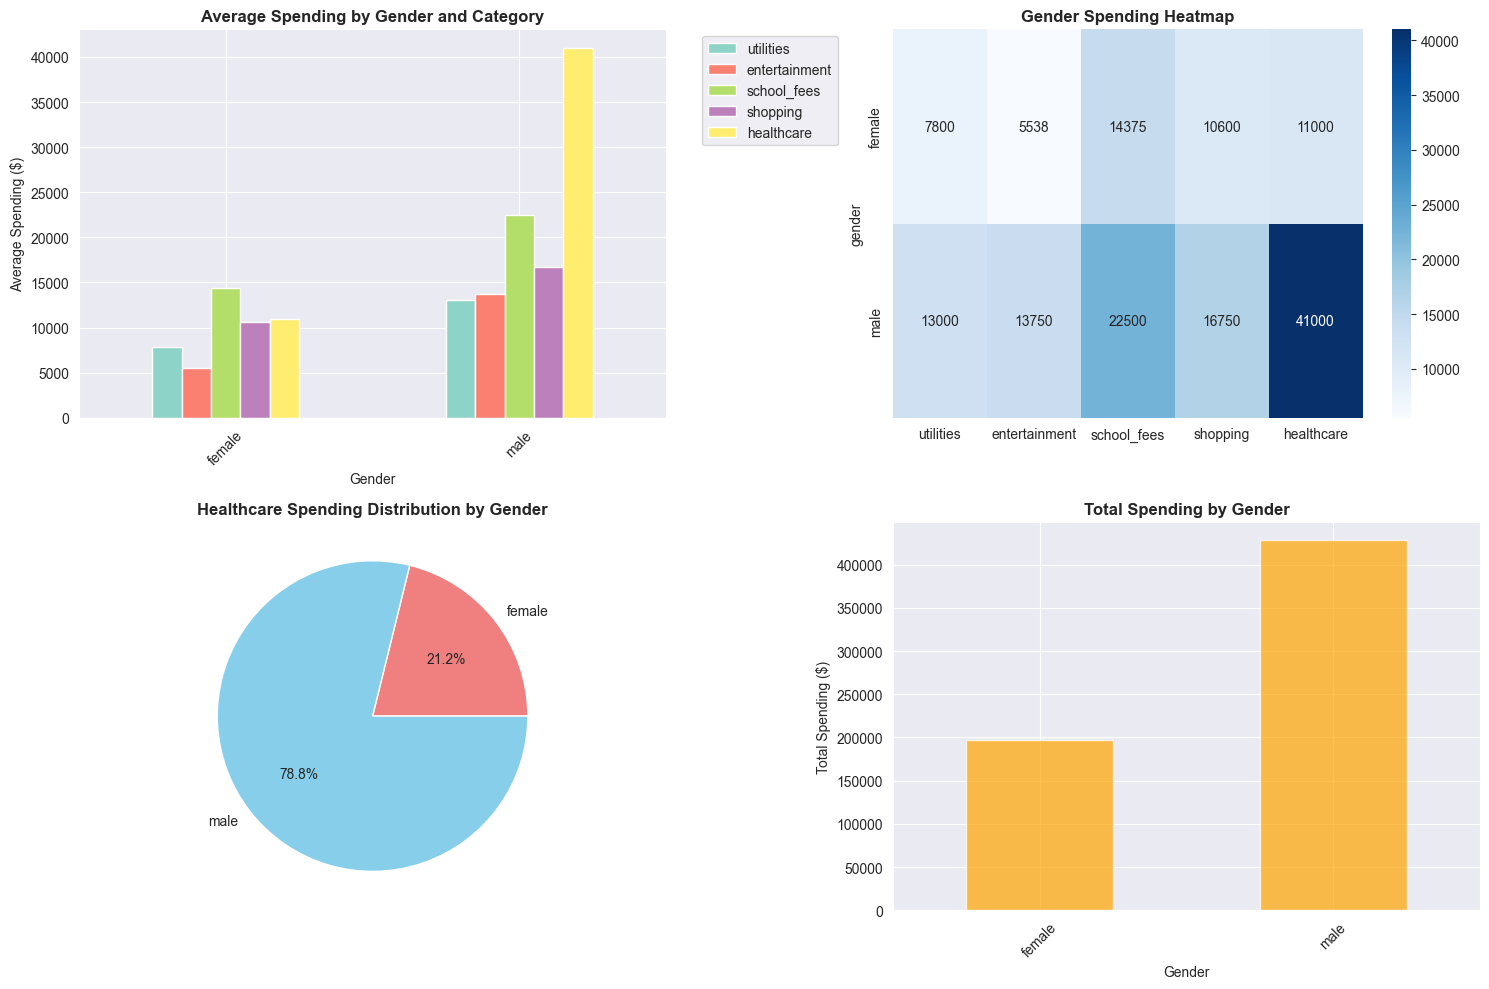

✅ Chart exported as 'gender_spending_chart.png' for PowerPoint


In [4]:
# ASSIGNMENT REQUIREMENT: Show gender distribution across spending categories
print("👥 REQUIREMENT 2: Gender Distribution Across Spending Categories")
print("-" * 70)

# Create the gender spending visualization
plt.figure(figsize=(15, 10))

# Get spending categories
categories = ['utilities', 'entertainment', 'school_fees', 'shopping', 'healthcare']
gender_data = user.data.groupby('gender')[categories].mean()

# Subplot 1: Bar chart by category
plt.subplot(2, 2, 1)
gender_data.plot(kind='bar', ax=plt.gca(), colormap='Set3')
plt.title('Average Spending by Gender and Category', fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Average Spending ($)')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Subplot 2: Heatmap
plt.subplot(2, 2, 2)
sns.heatmap(gender_data, annot=True, fmt='.0f', cmap='Blues')
plt.title('Gender Spending Heatmap', fontweight='bold')

# Subplot 3: Healthcare focus (since this is healthcare survey)
plt.subplot(2, 2, 3)
healthcare_by_gender = user.data.groupby('gender')['healthcare'].mean()
healthcare_by_gender.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'skyblue', 'lightgreen'])
plt.title('Healthcare Spending Distribution by Gender', fontweight='bold')
plt.ylabel('')

# Subplot 4: Total spending comparison
plt.subplot(2, 2, 4)
total_spending = user.data.groupby('gender')[categories].sum().sum(axis=1)
total_spending.plot(kind='bar', color='orange', alpha=0.7)
plt.title('Total Spending by Gender', fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Total Spending ($)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('gender_spending_chart.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Chart exported as 'gender_spending_chart.png' for PowerPoint")